In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel("BD_creditos.xlsx")

El dataset ontiene informacion de 10.763 registros de creditos con 23 variables que describen tanto las caracteristicas de los prestamos como las de los clientes

**Descripcion de los datos**

+ Tipo_credito: Identificador numerico del tipo de credito

+ Fecha_prestamo: Fecha en la que se otorgo el prestamo

+ Capital_prestado: Monto del credito otorgado

+ Plazo_meses: Duracion del prestamo en meses

+ Edad_cliente: Edad del cliente solicitante

+ Tipo_laboral: Tipo de ocupacion del cliente (Empleado, Independiente)

+ Salario_cliente: Ingresos mensuales del cliente

+ Total_otros_prestamos: Monto total acumulado de otros prestamos que tiene actualmente ademas del prestamo principal que se esta evaluando.

+ Cuota_pactada: Valor de la cuota mensual del prestamos

+ Puntaje: Calificacion interna de riego del cliente

+ Puntaje_datacredito: Puntaje externo e riesgo crediticio

+ Cant_creditosvigentes: Numero de creditos activos que tiene el cliente

+ Huella_consulta: Numero de veces que el cliente ha sifo consultado en centrales de riesgo

+ Saldo_mora: Valor en mora del credito

+ Saldo_total: Total pendiente por pagar

+ Saldo_principal: Capital pendiente por pagar

+ Saldo_mora_codeudor: Mora asociada al codeudor

+ Creditos_sectorFinanciero: Numero de creditos con entidades financieras

+ Creditos_sectorCooperativo: Numero de creditos con cooperativas

+ Creditos_sectorReal: Numero de creditos con el sector real (comercio, servicios, etc.)

+ Promedio_ingresos_datacredito: Ingreso promedio reportado en Datacredito

+ Tendencia_ingresos: Tendencia de ingresos (Creciente, Decreciente, Estable)

+ Pago_atiempo: Variable objetivo (1 = cliente paga a tiempo, 0 = presenta incumplimiento)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

Vamos a eliminar aquellos atributos que tengan demasiados valores nulos y en los cuales necesitemos hacer un esfuerzo muy grande para encontrar los valores correctos y necesitemos imputar una gran cantidad de datos. En este caso, no se ve necesario eliminar columnas y se realizara imputación en el proceso de ingenieria de caracteristicas, a simple vista tampoco se ven variables redundantes o irrelevantes. En este caso vamos a usar los nulos como estan por defecto. np.nan

In [5]:
df.replace(["", " ", "NA", "N/A", "NULL", "None", "Desconocido"], np.nan, inplace= True)

Tipo de variables

Variables categoricas

**Ordinales:**

+ Tendencia_ingresos

**Nominales:**

+ Tipo_credito

+ Tipo_laboral

+ Pago_atiempo

**Discretas:**

+ Fecha_prestamo

+ Plazo_meses

+ Edad_cliente

+ Cant_creditosvigentes

+ Huella_consulta

+ Creditos_sectorFinanciero

+ Creditos_sectorCooperativo

+ Creditos_sectorReal


**Continuas:**

+ Capital_prestado

+ Salario_cliente

+ Total_otros_prestamos

+ Cuota_pactada

+ Puntaje

+ Puntaje_datacredito

+ Saldo_mora

+ Saldo_total

+ Saldo_principal

+ Saldo_mora_codeudor

+ Promedio_ingresos_datacredito

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  object        
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [7]:
df.tipo_credito.value_counts()

tipo_credito
4     7747
9     2876
10     116
6       21
7        2
68       1
Name: count, dtype: int64

In [8]:
df.tipo_laboral.value_counts()

tipo_laboral
Empleado         6754
Independiente    4009
Name: count, dtype: int64

In [9]:
df.Pago_atiempo.value_counts()

Pago_atiempo
1    10252
0      511
Name: count, dtype: int64

In [10]:
df.tendencia_ingresos.value_counts()

tendencia_ingresos
Creciente      5294
Decreciente    1291
Estable        1188
0                 7
8315              6
1000000           4
9147              2
158042            1
168750            1
3978              1
-28589            1
-566272           1
24702             1
31837             1
122727            1
417087            1
9090              1
173031            1
-70715            1
-435177           1
-702927           1
-4105             1
54683             1
22832             1
209090            1
5697              1
10808             1
-288              1
-164315           1
2029000           1
17181             1
15245             1
82657             1
52862             1
1817052           1
75761             1
146918            1
1123000           1
15090             1
4250635           1
22363             1
-101368           1
86286             1
65988             1
77975             1
-224714           1
Name: count, dtype: int64

Se observa que la variable tendencia_ingresos deberia contener la informacion: Decreciente, Estable, Creciente. Sin embargo, observamos que hay valores numericos, entonces se decide arreglar estos datos numericos teniendo en cuenta lo siguiente: Si el numero es > 0, es creciente, Si el numero es = 0, es estable y si el numero es < 0, es decreciente.

In [11]:
def limpiar_tendencia(valor):
  if pd.isna(valor):
    return np.nan

  #Si ya esta como categoria valida, mantenerlo
  if str(valor).strip().lower() in ["creciente", "decreciente", "estable"]:
    return str(valor).capitalize()

  try:
    num = float(valor)
    if num == 0:
      return "Estable"
    elif num > 0:
      return "Creciente"
    else:
      return "Decreciente"
  except:
    return np.nan #En caso de algo raro

In [12]:
df["tendencia_ingresos"] = df["tendencia_ingresos"].apply(limpiar_tendencia)

In [13]:
df.tendencia_ingresos.value_counts()

tendencia_ingresos
Creciente      5335
Decreciente    1301
Estable        1195
Name: count, dtype: int64

** Creacion de nuevas variables**

Relacion entre total de la deuda y el salario (Deuda/ingreso): Indica que porcentaje del salario de un cliente esta comprometido para pagar deudas, una relacion alta significa que gran parte de los ingresos se destian al pago de deudas

Relacion D/I = cuota_pactada / salario_cliente

In [14]:
df["relacion_deuda_ingreso"] = df["cuota_pactada"] / df["salario_cliente"]

In [15]:
valores_a_buscar = [np.inf, -np.inf]

df_infinitos = df[df['relacion_deuda_ingreso'].isin(valores_a_buscar)]

df_infinitos

tipo_credito      fecha_prestamo  capital_prestado  plazo_meses  \
74                9 2024-12-06 17:11:19          677718.0           10   
289               9 2024-11-29 10:00:21         1459977.6           10   
320               4 2025-08-28 15:15:45          840000.0            6   
392               9 2025-01-16 10:47:36         3424414.8           10   
461               6 2025-08-23 08:51:10         1843218.0           12   
462               9 2024-11-27 14:24:58         2414822.4            9   
1057              9 2024-12-15 12:35:54         2311030.8           11   
1405              9 2025-03-01 12:54:40         2030037.6           10   
1486              9 2025-06-07 17:27:16          964020.0            7   
2864              9 2024-12-11 16:43:42         6529003.2            9   
3440              4 2025-10-03 15:15:58         2416800.0            6   
3508              9 2026-02-19 12:00:24         6310250.4           10   
3636              9 2024-12-12 17:12:54         2332394.4           10   
3792              9 2025-07-18 16:08:31         3353446.8           11   
5028              4 2025-12-29 15:41:40        22502400.0            8   
5216              9 2025-01-05 11:20:54         2917122.0            9   
5307              9 2025-07-18 14:32:31         2472045.6           11   
5681              4 2025-03-20 10:06:13         4224000.0            6   
6793              9 2025-08-02 10:21:13         3276768.0           10   
6842              9 2025-11-29 16:30:55         1460986.8            9   
7191              9 2026-01-01 18:33:41         5219283.6           10   
8029              7 2025-03-15 14:37:25        12542263.2           90   
10309             4 2025-09-11 09:39:33         7200000.0           12   
10360             4 2026-01-08 15:57:52         1236000.0           12   

       edad_cliente   tipo_laboral  salario_cliente  total_otros_prestamos  \
74               68       Empleado                0                      0   
289              59  Independiente                0                2000000   
320              41       Empleado                0                      0   
392              38  Independiente                0                      0   
461              67       Empleado                0                 337000   
462              65  Independiente                0                      0   
1057             42  Independiente                0                2000000   
1405             68       Empleado                0                      0   
1486             61  Independiente                0                      0   
2864             57       Empleado                0                 430000   
3440             59  Independiente                0                      0   
3508             57  Independiente                0                      0   
3636             47       Empleado                0                      0   
3792             51  Independiente                0                      0   
5028             41       Empleado                0                      0   
5216             45       Empleado                0                      0   
5307             64       Empleado                0                      0   
5681             41  Independiente                0                      0   
6793             52  Independiente                0                      0   
6842             66  Independiente                0                      0   
7191             22       Empleado                0                      0   
8029             29       Empleado                0                1500000   
10309            32  Independiente                0                      0   
10360            36       Empleado                0                      0   

       cuota_pactada    puntaje  ...  saldo_total  saldo_principal  \
74             57390  95.227787  ...      71240.0          71240.0   
289           123634  95.227787  ...       6365.0           4687.

In [16]:
df.relacion_deuda_ingreso[df["relacion_deuda_ingreso"].isin(valores_a_buscar)] = np.nan

C:\Users\Juan\AppData\Local\Temp\ipykernel_16304\2692541249.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.relacion_deuda_ingreso[df["relacion_deuda_ingreso"].isin(valores_a_buscar)] = np.nan
C:\Users\Juan\AppData\Local\Temp\ipykerne

In [17]:
df["tendencia_ingresos"] = pd.Categorical(df["tendencia_ingresos"], categories=["Decreciente", "Estable", "Creciente"], ordered=True)
df["tipo_credito"] = df["tipo_credito"].astype("category")
df["Pago_atiempo"] = df["Pago_atiempo"].astype("category")
df["tipo_laboral"] = df["tipo_laboral"].astype("category")

In [18]:
print("\nValores nulos por columna:\n", df.isnull().sum())


Valores nulos por columna:
 tipo_credito                        0
fecha_prestamo                      0
capital_prestado                    0
plazo_meses                         0
edad_cliente                        0
tipo_laboral                        0
salario_cliente                     0
total_otros_prestamos               0
cuota_pactada                       0
puntaje                             0
puntaje_datacredito                 6
cant_creditosvigentes               0
huella_consulta                     0
saldo_mora                        156
saldo_total                       156
saldo_principal                   405
saldo_mora_codeudor               590
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
promedio_ingresos_datacredito    2930
tendencia_ingresos               2932
Pago_atiempo                        0
relacion_deuda_ingreso             24
dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  category      
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  category      
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvi

In [20]:
df.describe()

fecha_prestamo  capital_prestado   plazo_meses  \
count                          10763      1.076300e+04  10763.000000   
mean   2025-04-16 23:06:02.111121664      2.434315e+06     10.575583   
min              2024-11-26 09:17:04      3.600000e+05      2.000000   
25%       2025-01-20 17:33:07.500000      1.224831e+06      6.000000   
50%              2025-03-27 16:23:12      1.921920e+06     10.000000   
75%              2025-06-16 13:27:58      3.084840e+06     12.000000   
max              2026-04-26 18:43:52      4.144415e+07     90.000000   
std                              NaN      1.909643e+06      6.632082   

       edad_cliente  salario_cliente  total_otros_prestamos  cuota_pactada  \
count  10763.000000     1.076300e+04           1.076300e+04   1.076300e+04   
mean      43.948620     1.721643e+07           6.238870e+06   2.436174e+05   
min       19.000000     0.000000e+00           0.000000e+00   2.394400e+04   
25%       33.000000     2.000000e+06           5.000000e+05   1.210415e+05   
50%       42.000000     3.000000e+06           1.000000e+06   1.828630e+05   
75%       53.000000     4.875808e+06           2.000000e+06   2.878335e+05   
max      123.000000     2.200000e+10           6.787675e+09   3.816752e+06   
std       15.060877     3.554767e+08           1.184183e+08   2.104937e+05   

            puntaje  puntaje_datacredito  cant_creditosvigentes  \
count  10763.000000         10757.000000           10763.000000   
mean      91.170036           780.790834               5.726749   
min      -38.009990            -7.000000               0.000000   
25%       95.227787           757.000000               3.000000   
50%       95.227787           791.000000               5.000000   
75%       95.227787           825.000000               8.000000   
max       95.227787           999.000000              62.000000   
std       16.465441           104.878031               3.977162   

       huella_consulta    saldo_mora   saldo_total  saldo_principal  \
count     10763.000000  10607.000000  1.060700e+04     1.035800e+04   
mean          4.228561      7.746017  4.593741e+04     4.034617e+04   
min           0.000000      0.000000  0.000000e+00     0.000000e+00   
25%           2.000000      0.000000  2.898000e+03     2.690000e+03   
50%           4.000000      0.000000  1.617800e+04     1.444250e+04   
75%           6.000000      0.000000  5.298200e+04     4.763225e+04   
max          29.000000  12534.000000  5.116066e+06     1.562285e+06   
std           3.064683    225.955117  1.062698e+05     7.124244e+04   

       saldo_mora_codeudor  creditos_sectorFinanciero  \
count         10173.000000               10763.000000   
mean              0.260002                   2.779987   
min               0.000000                   0.000000   
25%               0.000000                   1.000000   
50%               0.000000                   2.000000   
75%               0.000000                   4.000000   
max            2145.000000                  51.000000   
std              21.772917                   2.748807   

       creditos_sectorCooperativo  creditos_sectorReal  \
count                10763.000000         10763.000000   
mean                     0.269813             1.302704   
min                      0.000000             0.000000   
25%                      0.000000             0.000000   
50%                      0.000000             1.000000   
75%                      0.000000             2.000000   
max                     13.000000            25.000000   
std                      0.716471             1.824430   

       promedio_ingresos_datacredito  relacion_deuda_ingreso  
count                   7.833000e+03            10739.000000  
mean                    2.005157e+06                0.094674  
min                     0.000000e+00                0.000008  
25%                     9.251570e+05                0.038713  
50%                     1.204496e+06                0.060864  
75%        

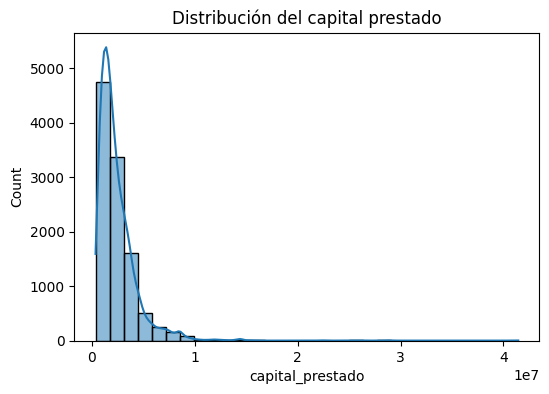

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df["capital_prestado"], bins=30, kde=True)
plt.title("Distribución del capital prestado")
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_16304\372845807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pago_atiempo", y="puntaje_datacredito", data=df, palette="Set2")


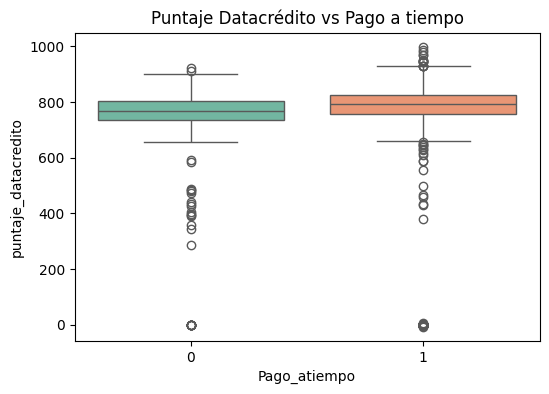

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Pago_atiempo", y="puntaje_datacredito", data=df, palette="Set2")
plt.title("Puntaje Datacrédito vs Pago a tiempo")
plt.show()

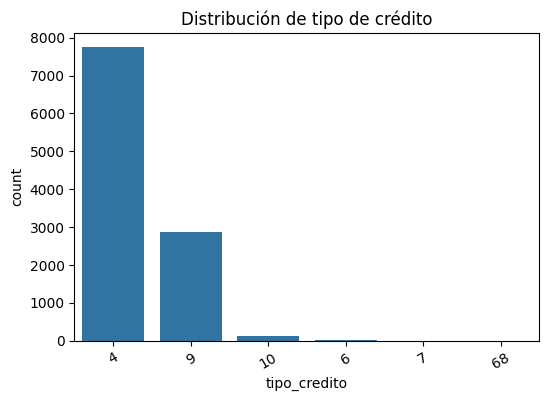

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x="tipo_credito", data=df, order=df["tipo_credito"].value_counts().index)
plt.title("Distribución de tipo de crédito")
plt.xticks(rotation=30)
plt.show()


C:\Users\Juan\AppData\Local\Temp\ipykernel_16304\3000269198.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = (df.groupby(["tipo_credito","Pago_atiempo"]).size() / df.groupby("tipo_credito").size()).unstack()
C:\Users\Juan\AppData\Local\Temp\ipykernel_16304\3000269198.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop = (df.groupby(["tipo_credito","Pago_atiempo"]).size() / df.groupby("tipo_credito").size()).unstack()


<Figure size 600x400 with 0 Axes>

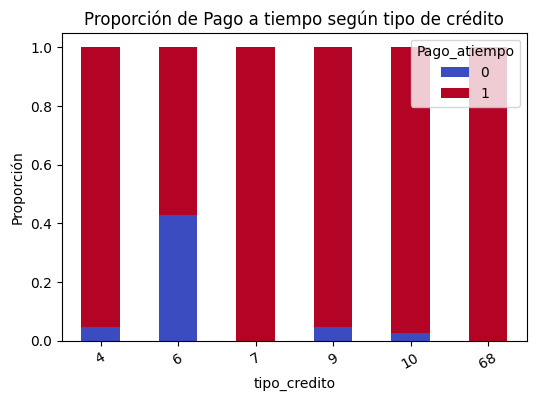

In [24]:
plt.figure(figsize=(6,4))
prop = (df.groupby(["tipo_credito","Pago_atiempo"]).size() / df.groupby("tipo_credito").size()).unstack()
prop.plot(kind="bar", stacked=True, figsize=(6,4), colormap="coolwarm")
plt.title("Proporción de Pago a tiempo según tipo de crédito")
plt.ylabel("Proporción")
plt.xticks(rotation=30)
plt.show()


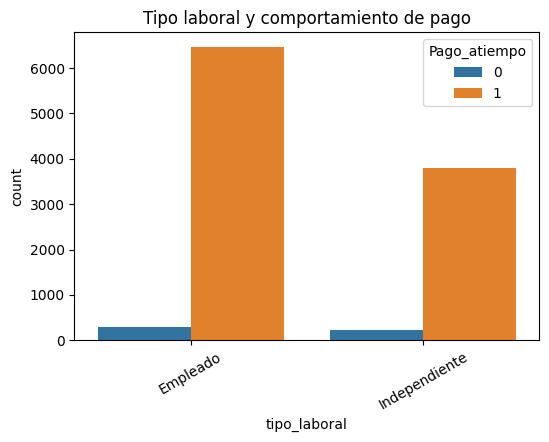

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x="tipo_laboral", hue="Pago_atiempo", data=df)
plt.title("Tipo laboral y comportamiento de pago")
plt.xticks(rotation=30)
plt.show()


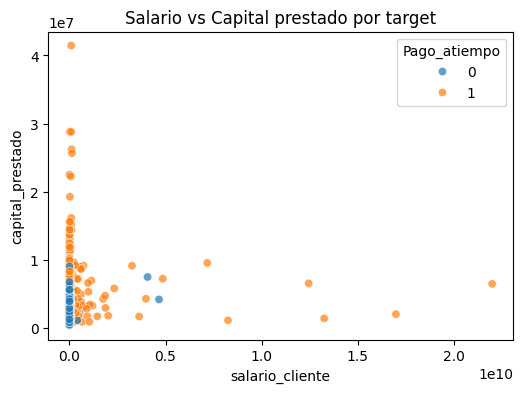

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="salario_cliente", y="capital_prestado", hue="Pago_atiempo", data=df, alpha=0.7)
plt.title("Salario vs Capital prestado por target")
plt.show()


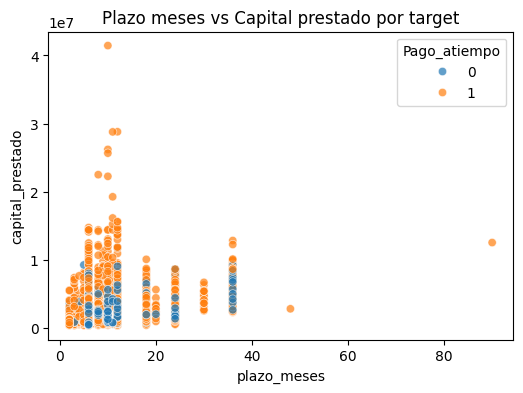

In [27]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="plazo_meses", y="capital_prestado", hue="Pago_atiempo", data=df, alpha=0.7)
plt.title("Plazo meses vs Capital prestado por target")
plt.show()

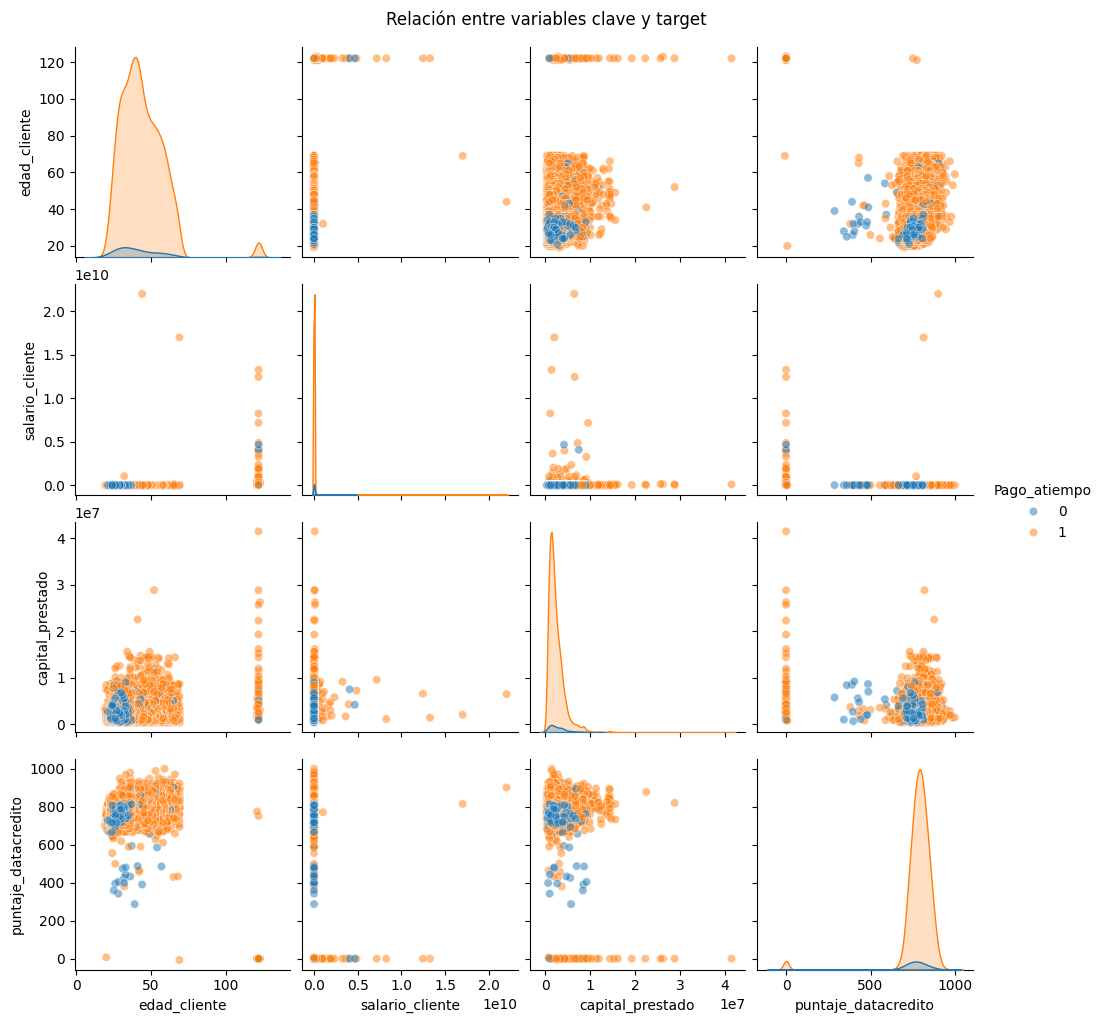

In [28]:
sns.pairplot(df[["edad_cliente","salario_cliente","capital_prestado","puntaje_datacredito","Pago_atiempo"]],
             hue="Pago_atiempo", diag_kind="kde", plot_kws={"alpha":0.5})
plt.suptitle("Relación entre variables clave y target", y=1.02)
plt.show()


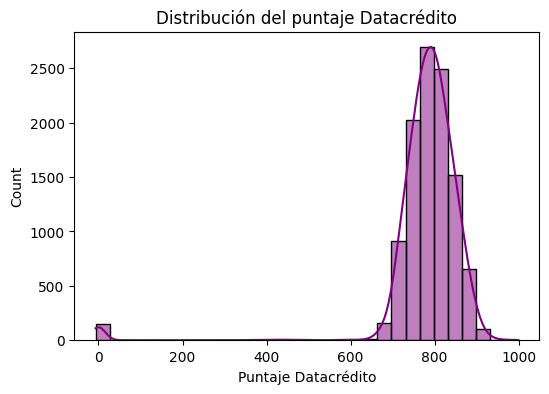

In [29]:
plt.figure(figsize=(6,4))
sns.histplot(df["puntaje_datacredito"], bins=30, kde=True, color="purple")
plt.title("Distribución del puntaje Datacrédito")
plt.xlabel("Puntaje Datacrédito")
plt.show()



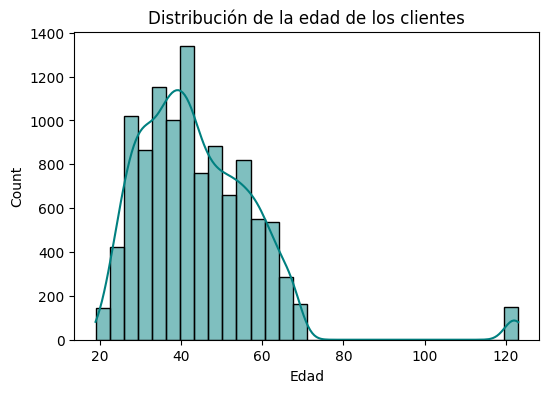

In [30]:
plt.figure(figsize=(6,4))
sns.histplot(df["edad_cliente"], bins=30, kde=True, color="teal")
plt.title("Distribución de la edad de los clientes")
plt.xlabel("Edad")
plt.show()



C:\Users\Juan\AppData\Local\Temp\ipykernel_16304\2069141945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pago_atiempo", y="cant_creditosvigentes", data=df, palette="Set2")


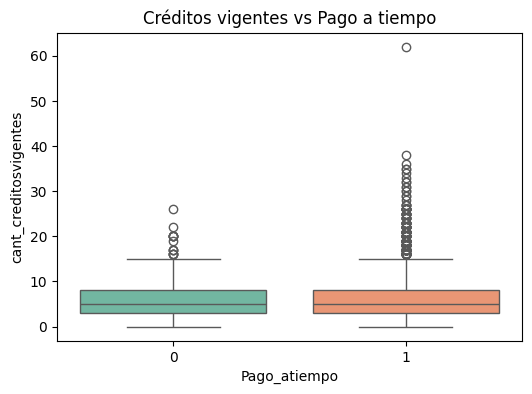

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Pago_atiempo", y="cant_creditosvigentes", data=df, palette="Set2")
plt.title("Créditos vigentes vs Pago a tiempo")
plt.show()


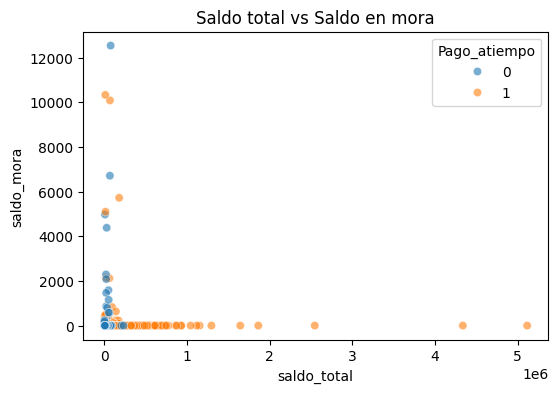

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="saldo_total", y="saldo_mora", hue="Pago_atiempo", data=df, alpha=0.6)
plt.title("Saldo total vs Saldo en mora")
plt.show()


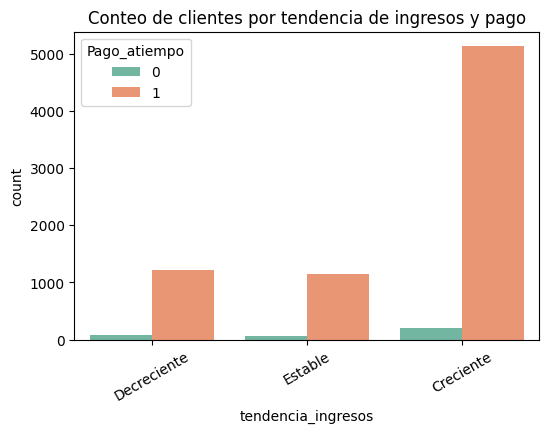

In [33]:
plt.figure(figsize=(6,4))
sns.countplot(x="tendencia_ingresos", hue="Pago_atiempo", data=df, palette="Set2")
plt.title("Conteo de clientes por tendencia de ingresos y pago")
plt.xticks(rotation=30)
plt.show()


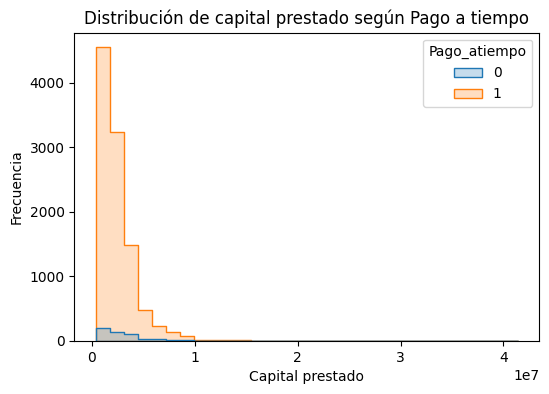

In [34]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="capital_prestado", hue="Pago_atiempo", bins=30, kde=False, element="step")
plt.title("Distribución de capital prestado según Pago a tiempo")
plt.xlabel("Capital prestado")
plt.ylabel("Frecuencia")
plt.show()


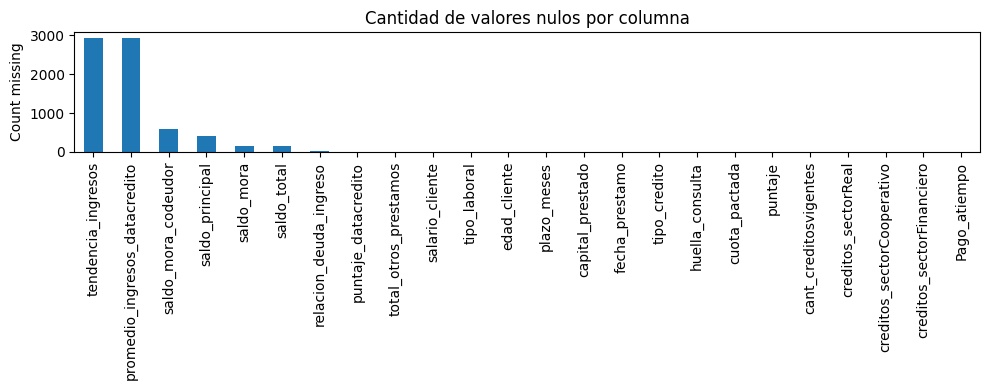

In [35]:
plt.figure(figsize=(10,4))
df.isnull().sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Cantidad de valores nulos por columna")
plt.ylabel("Count missing")
plt.tight_layout()
plt.show()


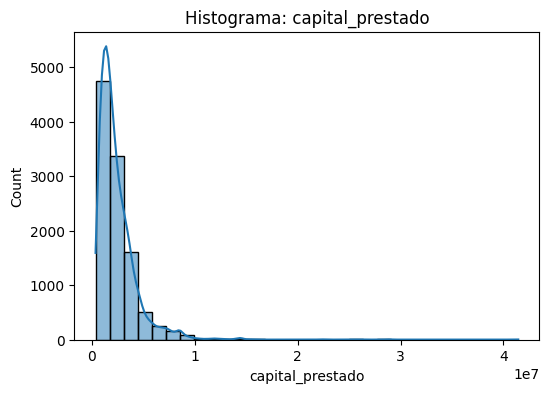

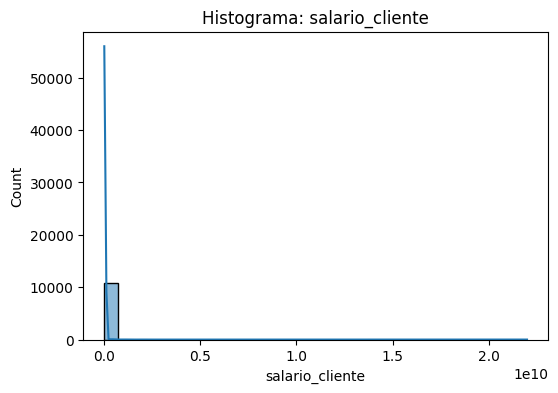

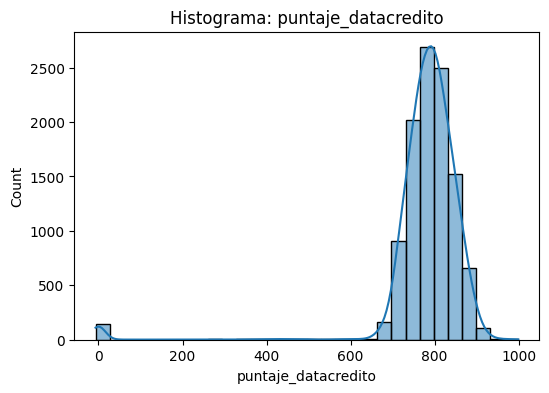

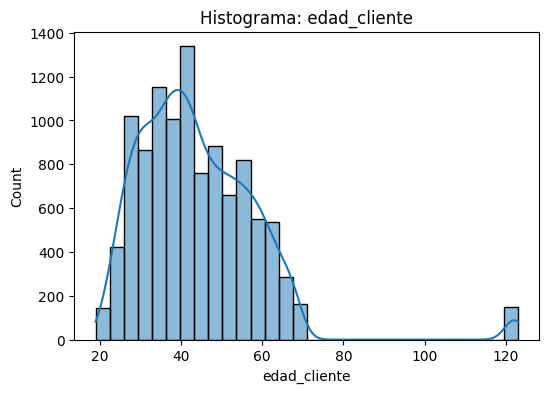

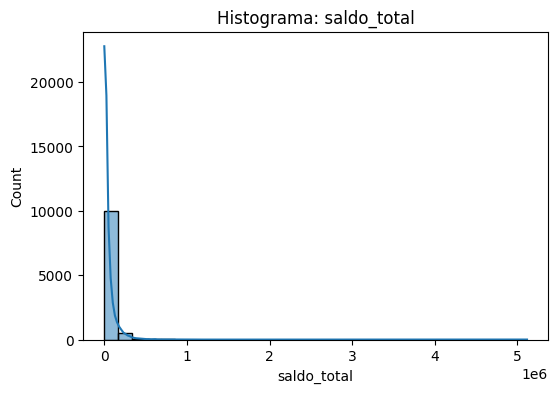

In [36]:
vars_hist = ["capital_prestado", "salario_cliente", "puntaje_datacredito",
             "edad_cliente", "saldo_total"]

for v in vars_hist:
    plt.figure(figsize=(6, 4))
    
    # Usamos sns.histplot y añadimos una curva de densidad con kde=True
    sns.histplot(data=df, x=v, bins=30, kde=True)
    
    plt.title(f"Histograma: {v}")
    plt.show()

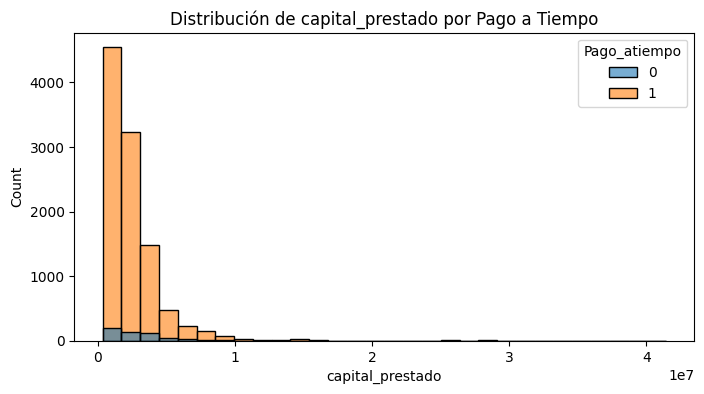

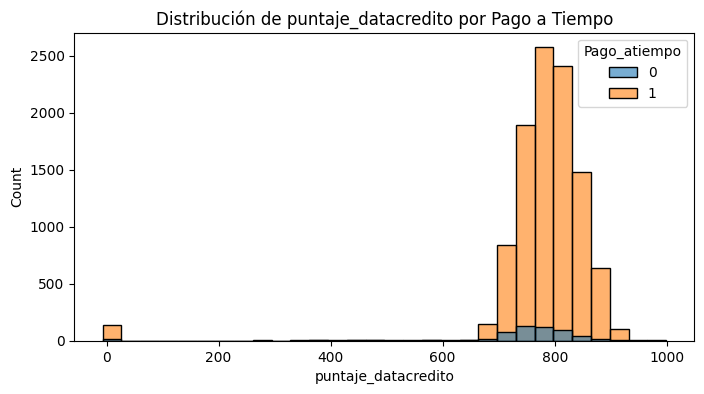

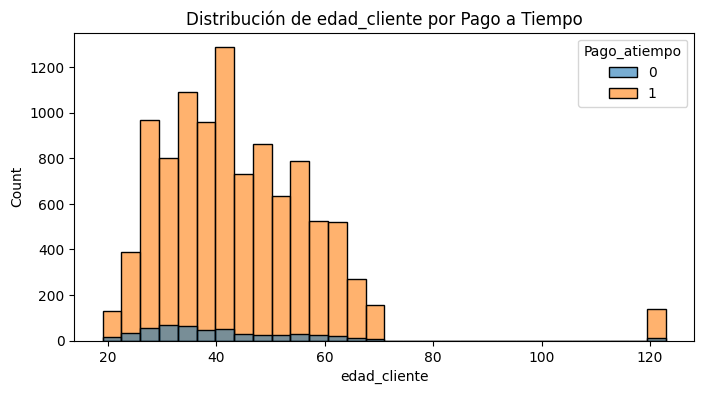

In [37]:
bivar_vars = ["capital_prestado", "puntaje_datacredito", "edad_cliente"]

# Bucle para crear un gráfico por cada variable
for v in bivar_vars:
    plt.figure(figsize=(8, 4))
    
    # Seaborn se encarga de todo en una sola línea
    sns.histplot(data=df, x=v, hue="Pago_atiempo", bins=30, multiple="layer", alpha=0.6)
    
    plt.title(f"Distribución de {v} por Pago a Tiempo")
    plt.show()

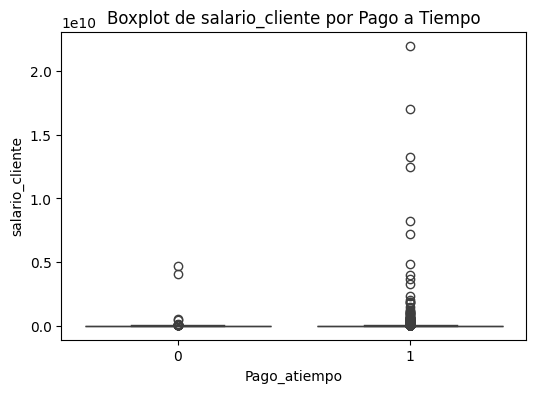

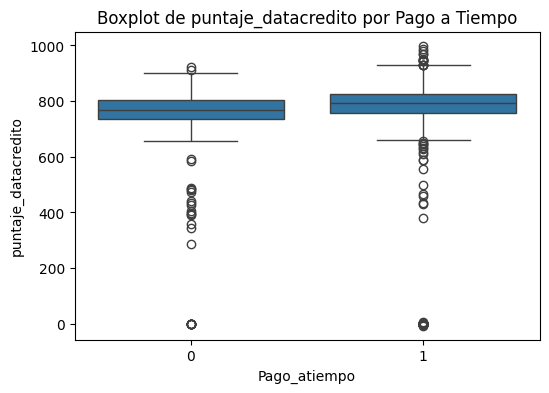

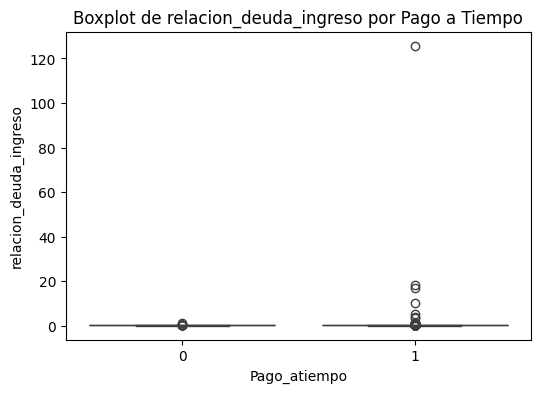

In [38]:
box_vars = ["salario_cliente", "puntaje_datacredito", "relacion_deuda_ingreso"]

for v in box_vars:
    plt.figure(figsize=(6, 4))
    
    # Seaborn agrupa los datos automáticamente con los parámetros 'x' y 'y'
    sns.boxplot(data=df, x="Pago_atiempo", y=v)
    
    plt.title(f"Boxplot de {v} por Pago a Tiempo")
    plt.show()

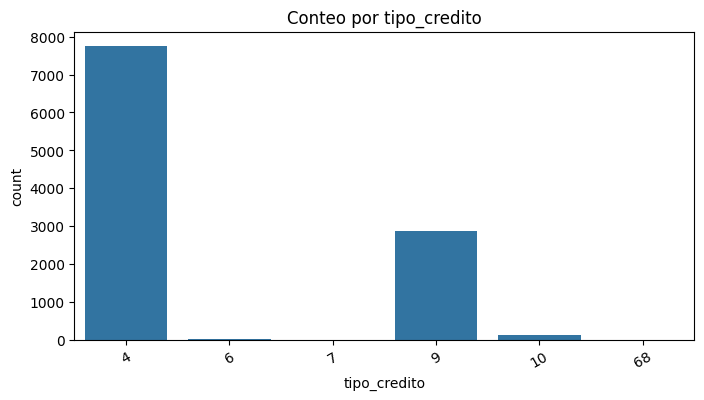

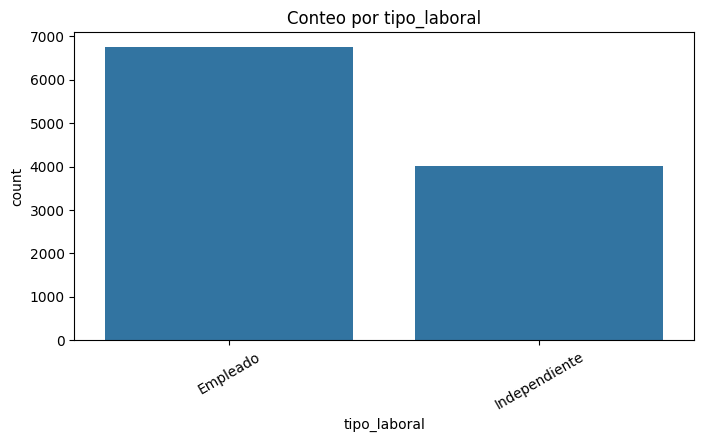

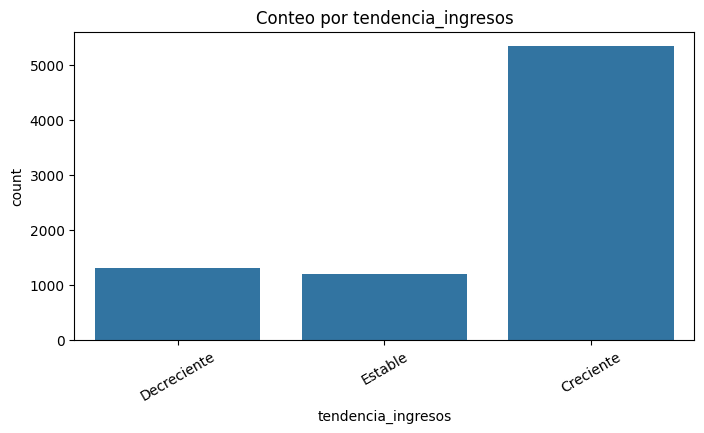

In [39]:
cat_vars = ["tipo_credito", "tipo_laboral", "tendencia_ingresos"]

for c in cat_vars:
    plt.figure(figsize=(8, 4))
    
    # sns.countplot hace el conteo y el gráfico por ti en una sola línea.
    sns.countplot(data=df, x=c)
    
    plt.title(f"Conteo por {c}")
    plt.xticks(rotation=30)
    plt.show()

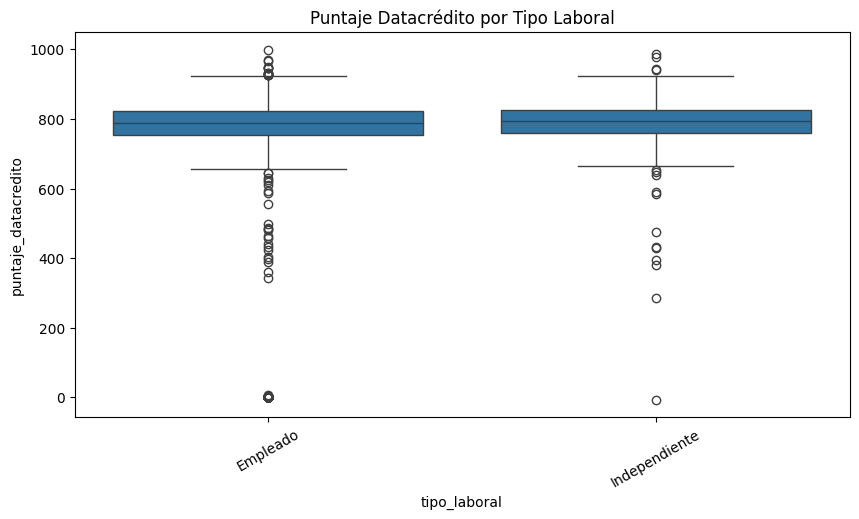

In [40]:
plt.figure(figsize=(10, 5))

# Seaborn crea el boxplot agrupado con una sintaxis muy simple.
sns.boxplot(data=df, x="tipo_laboral", y="puntaje_datacredito")

plt.title("Puntaje Datacrédito por Tipo Laboral")
plt.xticks(rotation=30)
plt.show()

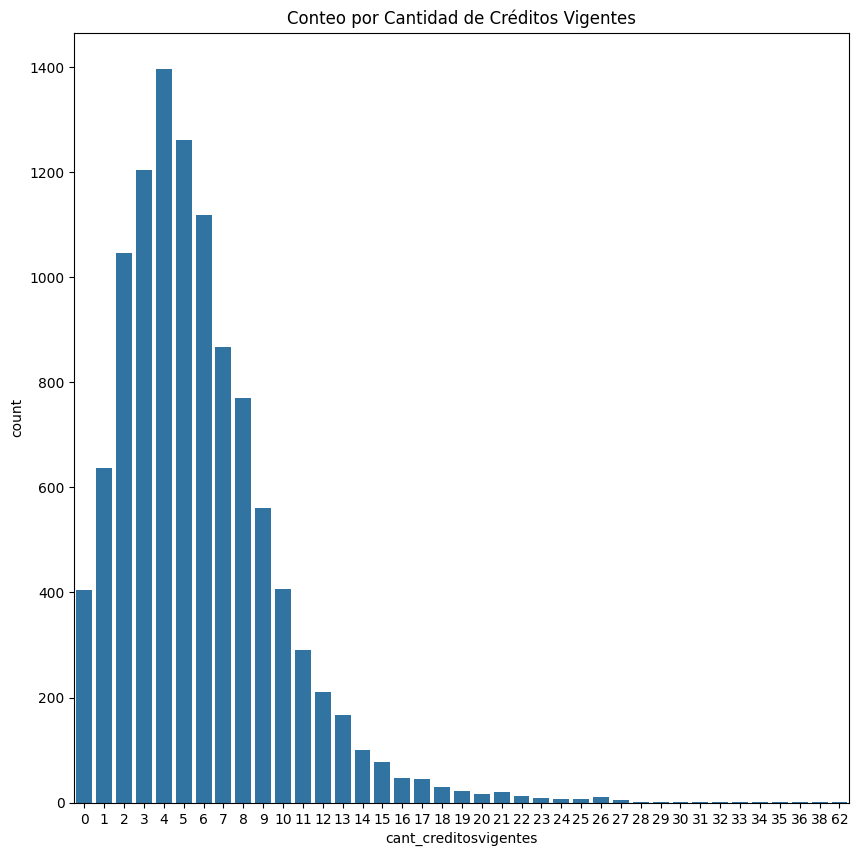

In [41]:
if "cant_creditosvigentes" in df.columns:
    plt.figure(figsize=(10, 10))
    
    # sns.countplot cuenta los valores, los ordena y crea el gráfico por ti.
    sns.countplot(data=df, x="cant_creditosvigentes")
    
    plt.title("Conteo por Cantidad de Créditos Vigentes")
    plt.show()

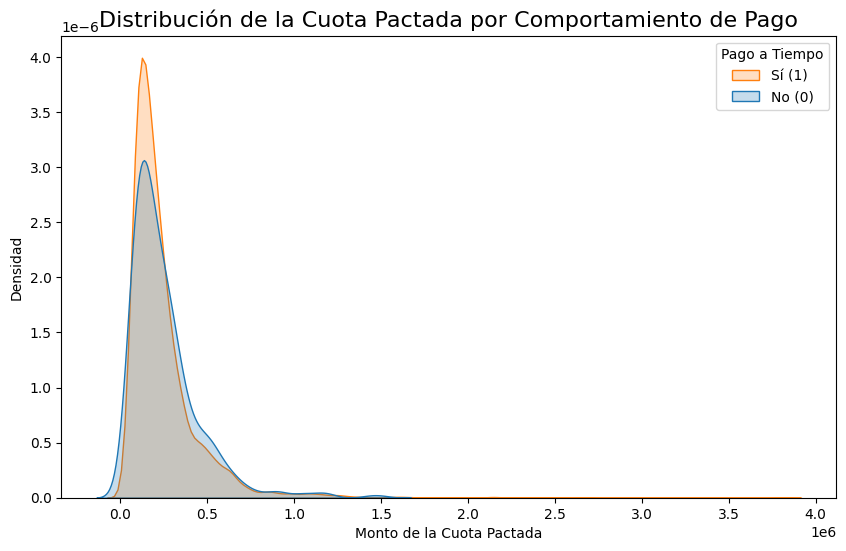

In [42]:
plt.figure(figsize=(10, 6))

# Usamos sns.kdeplot con 'hue' para separar por la variable objetivo
sns.kdeplot(
    data=df, 
    x="cuota_pactada", 
    hue="Pago_atiempo",
    fill=True, # Rellena el área bajo la curva para mayor claridad
    common_norm=False # Normaliza cada curva por separado
)

plt.title('Distribución de la Cuota Pactada por Comportamiento de Pago', fontsize=16)
plt.xlabel('Monto de la Cuota Pactada')
plt.ylabel('Densidad')
plt.legend(title='Pago a Tiempo', labels=['Sí (1)', 'No (0)'])

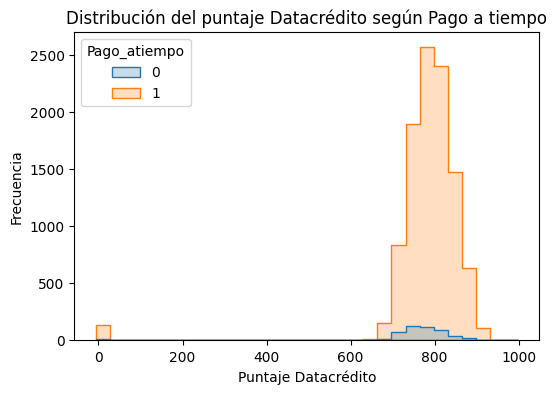

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="puntaje_datacredito", hue="Pago_atiempo", bins=30, kde=False, element="step")
plt.title("Distribución del puntaje Datacrédito según Pago a tiempo")
plt.xlabel("Puntaje Datacrédito")
plt.ylabel("Frecuencia")
plt.show()


In [42]:
data_num = pd.get_dummies(df, drop_first=True, dtype=int)
data_num.head()

fecha_prestamo  capital_prestado  plazo_meses  edad_cliente  \
0 2024-12-21 11:31:35         3692160.0           10            42   
1 2025-04-22 09:47:35          840000.0            6            60   
2 2026-01-08 12:22:40         5974028.4           10            36   
3 2025-08-04 12:04:10         1671240.0            6            48   
4 2025-04-26 11:24:26         2781636.0           11            44   

   salario_cliente  total_otros_prestamos  cuota_pactada    puntaje  \
0          8000000                2500000         341296  88.768094   
1          3000000                2000000         124876  95.227787   
2          4036000                 829000         529554  47.613894   
3          1524547                 498000         252420  95.227787   
4          5000000                4000000         217037  95.227787   

   puntaje_datacredito  cant_creditosvigentes  ...  relacion_deuda_ingreso  \
0                695.0                     10  ...                0.042662   
1                789.0                      3  ...                0.041625   
2                740.0                      4  ...                0.131208   
3                837.0                      4  ...                0.165570   
4                771.0                      4  ...                0.043407   

   tipo_credito_6  tipo_credito_7  tipo_credito_9  tipo_credito_10  \
0               0               1               0                0   
1               0               0               0                0   
2               0               0               1                0   
3               0               0               0                0   
4               0               0               1                0   

   tipo_credito_68  tipo_laboral_Independiente  tendencia_ingresos_Estable  \
0                0                           1                           1   
1                0                           0                           0   
2                0                           1                           0   
3                0                           0                           0   
4                0                           0                           0   

   tendencia_ingresos_Creciente  Pago_atiempo_1  
0                             0               1  
1                             1               1  
2                             0               0  
3                             1               1  
4                             1               1  

[5 rows x 29 columns]

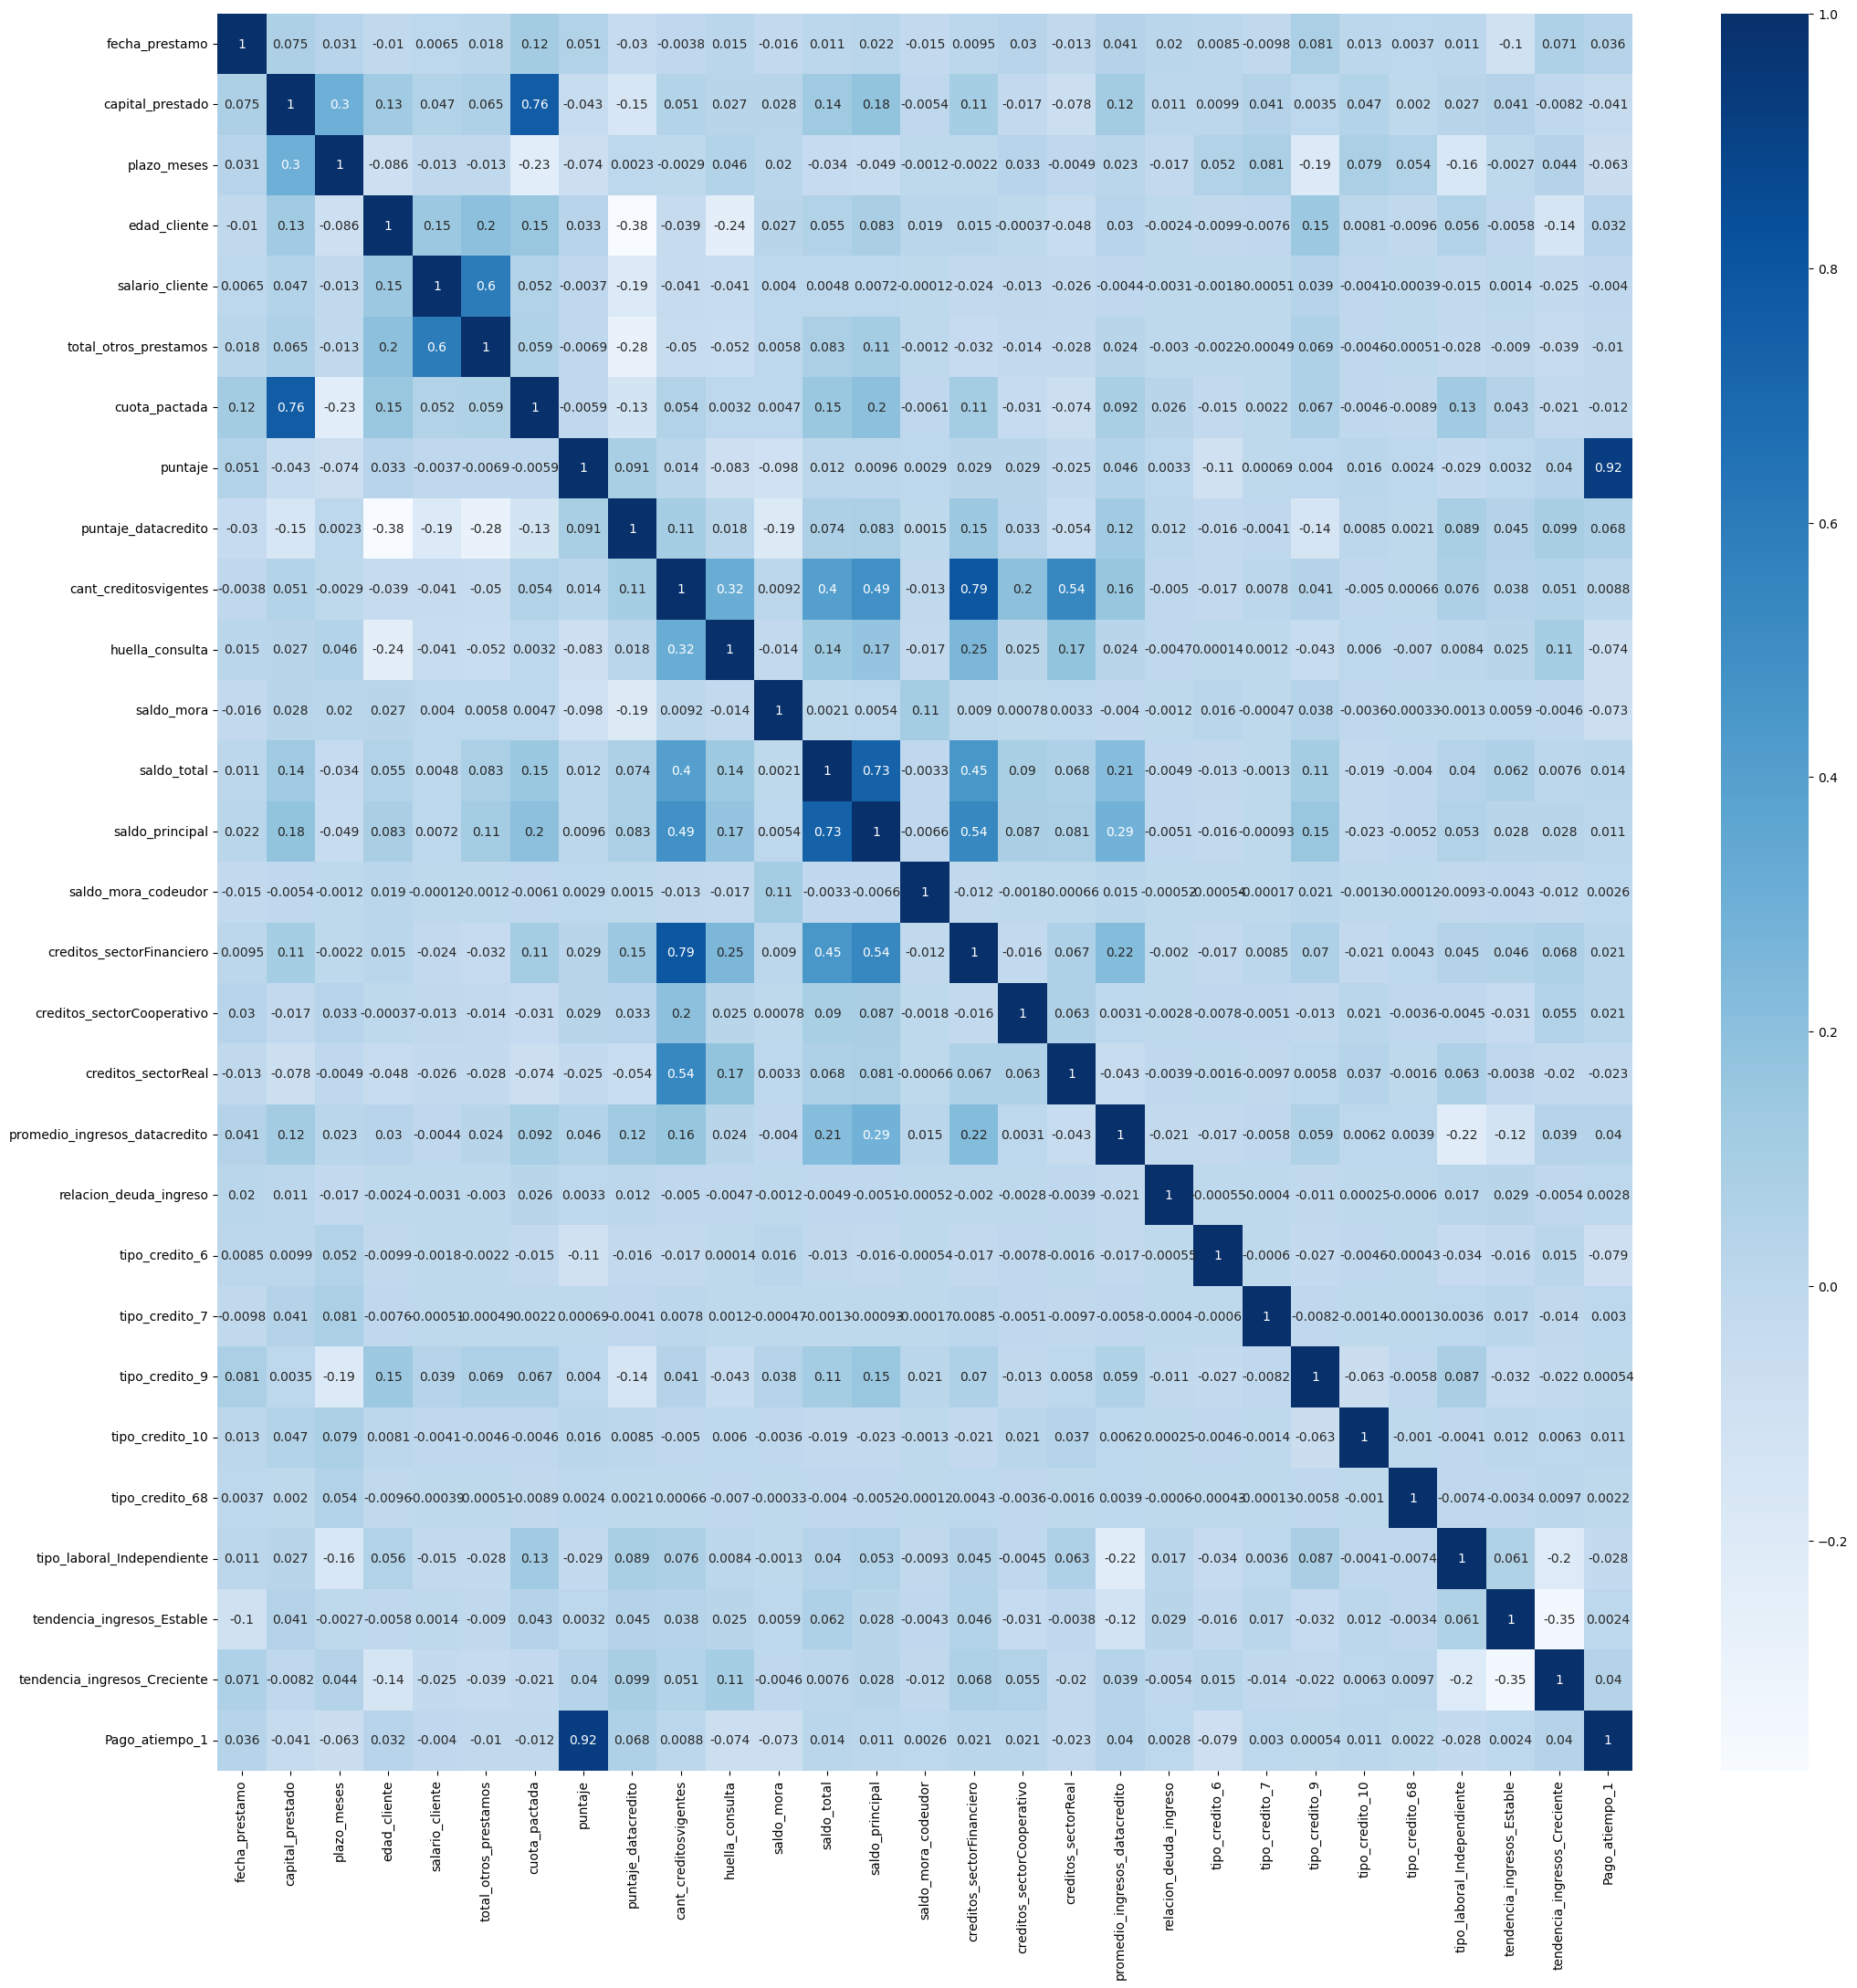

In [43]:
plt.figure(figsize=(25,25))
sns.heatmap(data_num.corr(), annot = True, cmap='Blues')
plt.show()

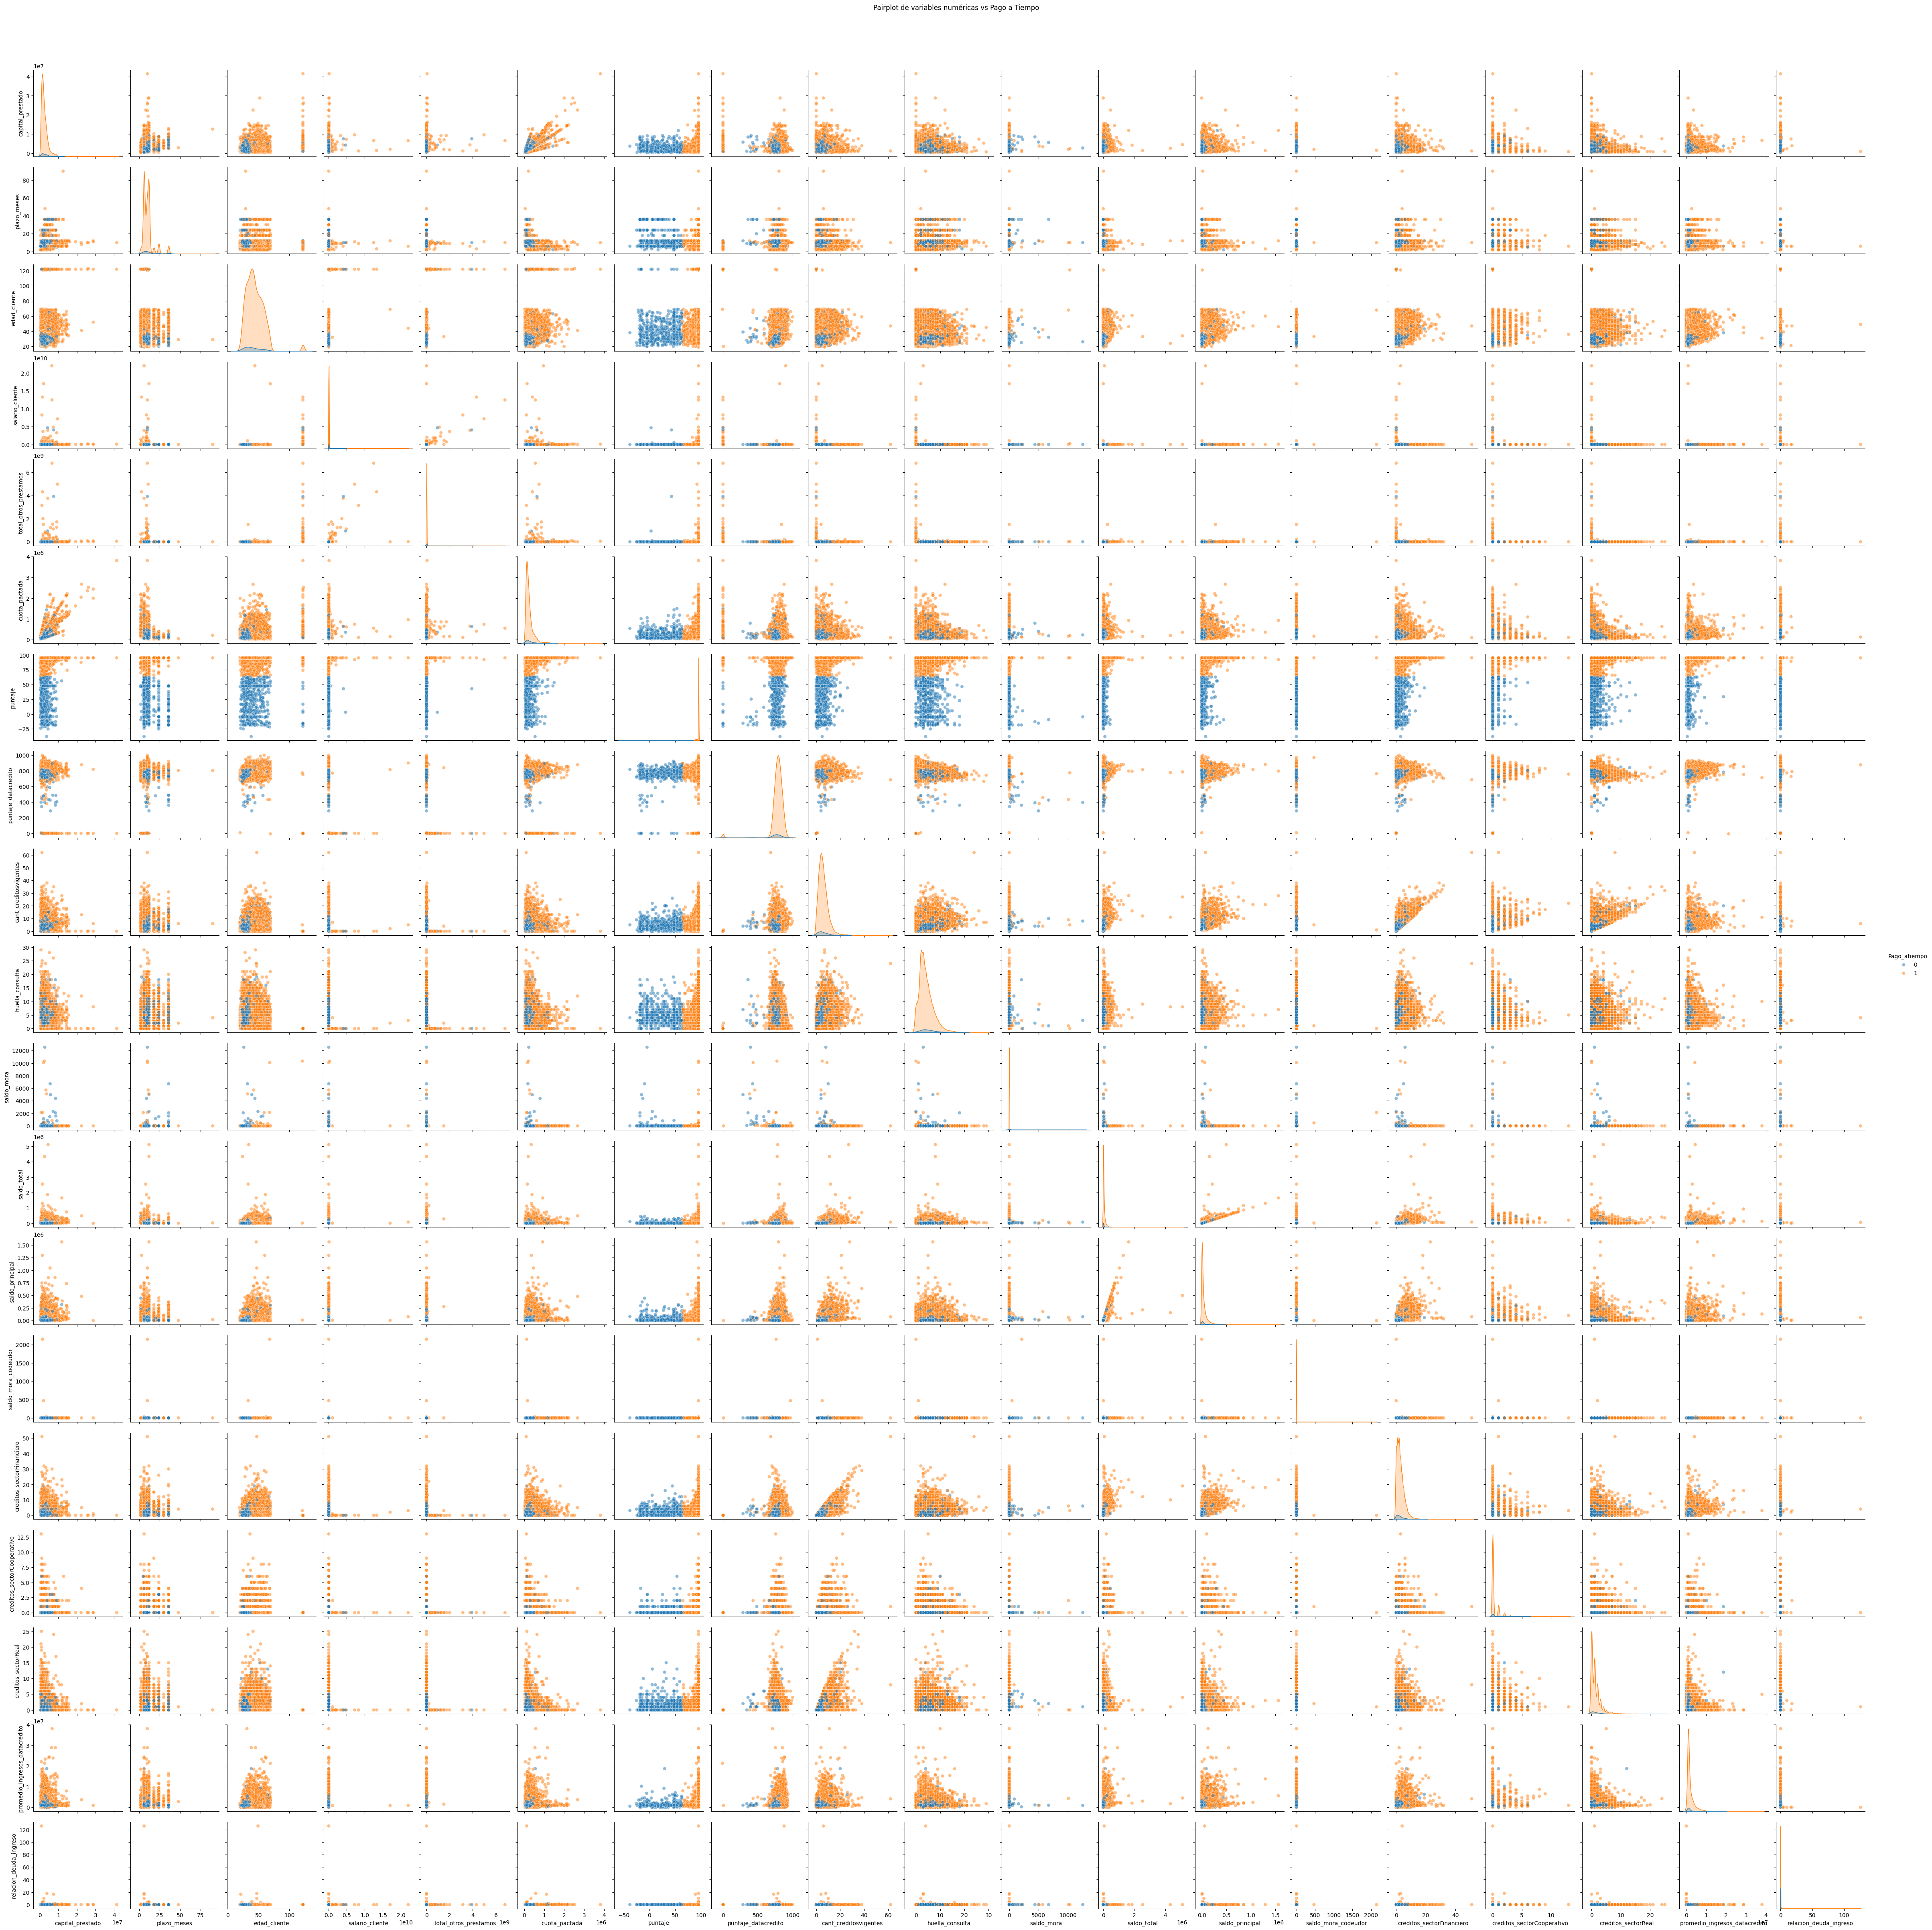

In [44]:
# Pairplot de todas las variables numéricas con respecto a la variable objetivo
sns.pairplot(df, hue="Pago_atiempo", diag_kind="kde", plot_kws={'alpha':0.5})

plt.suptitle("Pairplot de variables numéricas vs Pago a Tiempo", y=1.02)
plt.show()

**Reglas de validacion**

tipo_credito: Debe ser un valor numérico entero.

fecha_prestamo: Debe seguir el formato de fecha y hora YYYY-MM-DD HH:MM:SS.

capital_prestado: Debe ser un valor numérico y positivo, ya que el capital prestado no puede ser cero o negativo.

plazo_meses: Debe ser un número entero y positivo.

edad_cliente: Debe ser un número entero y coherente para un cliente de crédito (por ejemplo, entre 18 y 74 años).

tipo_laboral: Debe ser un valor de texto que pertenezca a un conjunto predefinido de categorías (por ejemplo, 'Empleado', 'Independiente').

salario_cliente y total_otros_prestamos: Deben ser valores numéricos y positivos.

cuota_pactada: Debe ser un valor numérico y positivo.

puntaje y puntaje_datacredito: Deben ser valores numéricos y deben encontrarse dentro de un rango aceptable. Por ejemplo, el puntaje de Datacrédito podría estar entre 150 y 950.

cant_creditosvigentes, huella_consulta, creditos_sectorFinanciero, creditos_sectorCooperativo, creditos_sectorReal: Deben ser valores numéricos enteros no negativos.

saldo_mora, saldo_total, saldo_principal, saldo_mora_codeudor: Deben ser valores numéricos no negativos.

promedio_ingresos_datacredito: Debe ser un valor numérico y positivo.

tendencia_ingresos: Debe ser un valor de texto que pertenezca a un conjunto de categorías predefinidas, como 'Estable' o 'Creciente'.

Pago_atiempo: Debe ser un valor binario (0 o 1).

In [ ]:
#Reglas de validacion 

#df.edad_cliente[df["edad_cliente"] < 18 | (df["edad_cliente"] > 74)] = np.nan
#df.relacion_deuda_ingreso[df["relacion_deuda_ingreso"].isin(valores_a_buscar)] = np.nan
#df.puntaje_datacredito[df["puntaje_datacredito"] < 150 | (df["puntaje_datacredito"] > 950) ] = np.nan
#df.plazo_meses[df["plazo_meses"] <= 0]
#df.huella_consulta[df["huella_consulta"] < 0]

C:\Users\Juan\AppData\Local\Temp\ipykernel_7768\3805792780.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.edad_cliente[df["edad_cliente"] < 18 | (df["edad_cliente"] > 74)] = np.nan
C:\Users\Juan\AppData\Local\Temp\ipykernel_7768\3805

Series([], Name: huella_consulta, dtype: int64)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  category      
 1   fecha_prestamo                 10763 non-null  datetime64[ns]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  category      
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10611 non-null  float64       
 11  cant_creditosvi

**Insights**

- Base de clientes de mediana edad: La gran mayoria de los clientes se concentran entre los 25 y 60 años, con un pico cercano a los 40, este es el perfil demografico mas activo economicamente

- Clientes con Buen Historial Crediticio: La mayoria de los clientes tienen un puntaje de Datacredito alto, concentrado entre 700 y 850. Esto sugiere que, en general, la cartera de clientes es de bajo riesgo inicial

- Prestamo de Bajo monto: La mayoria de los creditos son de montos pequeños, con una fuerte concentracion por debajo de los 10 millones

- Dominancia de un Tipo de Credito: El tipo de credito 4 representa la gran mayoria de los prestamos en el dataset, esto indica que es el producto principal de la empresa 

- Fuerte desbalance de clases: El problema mas grande del dataset es que esta desbalanceado, hay muchisimos mas clientes que pagan a tiempo que los que no

- La tendencia de ingresos importa: Aunque la mayoria de clientes tienen una tendencia de ingresos Creciente, aquellos con tendencia Decreciente tienen una proporcion de impago ligeramente mayor

- La edad por si sola no discrimina: La distribucion de edad cliente es casi identica para los clientes que pagan a tiempo y los que no

- Cartera Dominada por Empleados: El conteo por tipo laboral muestra que los Empleados son el segmento de clientes mas grandes, superando a los independientes

- La mayoria de los clientes son multicredito: El conteo de cantidad creditos vigentes revela que es muy comun que un cliente tenga multiples creditos

- Subgrupos de riesgo en todos los segmentos: A pesar de los buenos puntajes promedio, ambos grupos (Empleado e independiente) los outliers con puntaje muy bajos, indicando que el riesgo esta presente en todos los segmentos laborales

- Outliers Extremos en Salario: Hay valores de salario bastante elevados que son imposibles

- El tipo de credito 6 es el de mayor riesgo: A pesar de ser poco comun, el tipo de credito 6 muestra una proporcion de impago visiblemente mas alta que los demas

- Tener muchos creditos y pagar es buena señal: Aunque la mediana no es util, el boxplot muestra que el grupo de buenos pagadores tienen muchos mas outliers con una gran cantidad de creditos, esto podria ser un nicho de cliente de bajo riesgo, aquellos que pueden manejar multiples obligaciones financieras exitosamente

- Gran Incertidumbre sobre la Trayectoria Financiera: Una de las mayores debilidades de la cartera es la alta cantidad de valores nulos en tendencia ingresos, esto significa que para una gran parte de los clientes, no se tiene visibilidad sobre si su capacidad de pago está mejorando, empeorando o es estable

- Concentración en Cuotas Bajas: Ambas curvas, tanto para quienes pagan a tiempo como para quienes no, muestran una altísima concentración en la zona de cuotas bajas (probablemente por debajo de los 500,000). Esto es consistente con la idea de que la mayoría de los préstamos son de bajo monto.

- Los Impagos Tienen un Pico Ligeramente Más Alto: Aunque sutil, el pico de densidad para los clientes que no pagan (No (0)) parece estar ligeramente desplazado hacia la derecha en comparación con el pico de los que sí pagan. Esto sugiere que las cuotas moderadamente más altas podrían estar asociadas con un mayor estrés financiero y, por ende, un mayor riesgo de impago.

